# Classification Assignment

## Lead Scoring CaseStudy

### Problem Statement:

X Education sells online courses to industry professionals. X Education gets a lot of leads but its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. 

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Business Goal:

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. 


## Step 1: Reading and Understanding the Data

In [1]:
## For analysis and numerical functions
import pandas as pd
import numpy as np

## For Visualization and EDA
import seaborn as sns
import matplotlib.pyplot as plt

## for Classification and Model building

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

## Warnings
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Importing the dataset

leads=pd.read_csv('Leads.csv') 
pd.set_option('display.max_columns', None)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Inspect the various aspects of the data dataframe

## Step 2: Inspecting the Dataframe

In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Get the summary of the dataframe using 'describe()'
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Get the shape of the dataset
leads.shape

(9240, 37)

## Step 3: Data Cleaning

As We have noted the dataframe contains some ```Select``` values it means these are the Missing values

In [6]:
# Replacing 'select' values with nan values
leads = leads.replace('Select', np.nan)

In [7]:
# Checking if there are any duplicated rows
leads.duplicated().sum()

0

In [8]:
# Checking whether there is any missing value.
round((leads.isnull().mean()*100),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Here we found that lots of ```Missing values``` are there and it should be treated well.

In [9]:
# dropping the Columns with missing values > 40% 

drop_col = leads.columns[round((leads.isnull().mean()*100),2) > 40].tolist()
leads.drop(drop_col, axis=1, inplace=True)

In [10]:
# dropping 'Tags' as these comments are just indicating status entered by Sales Team 
# and also this column has very high null values

leads.drop('Tags',1,inplace=True)

Let's review each columns that have null values

In [11]:
# Exploring values in City Variable
leads['City'].value_counts(dropna=False, normalize = True)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [12]:
# Replacing Null values with Not provided.
leads['City']=leads['City'].replace(np.nan,'Not Provided')

In [13]:
# Exploring values in Country Variable
leads['Country'].value_counts(dropna=False, normalize = True)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Nigeria                  0.043290
Canada                   0.043290
South Africa             0.043290
Germany                  0.043290
Kuwait                   0.043290
Sweden                   0.032468
Uganda                   0.021645
Ghana                    0.021645
Netherlands              0.021645
Belgium                  0.021645
Bangladesh               0.021645
Italy                    0.021645
Asia/Pacific Region      0.021645
Philippines              0.021645
China                    0.021645
Malaysia      

In [14]:
# Replacing Null values with Not provided.
leads['Country']=leads['Country'].replace(np.nan,'Not Provided')

In [15]:
# Exploring values in Specialization Variable
leads['Specialization'].value_counts(dropna=False, normalize = True)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [16]:
# Replacing Null values with Not provided.
leads['Specialization']=leads['Specialization'].replace(np.nan,'Not Provided')

In [17]:
# Exploring values in "What is your current occupation" Variable
leads['What is your current occupation'].value_counts(dropna=False, normalize = True)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [18]:
# Replacing Null values with Not provided.

leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan,'Not Provided')

In [19]:
# Exploring values in "What matters most to you in choosing a course" Variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False, normalize = True)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [20]:
# Replacing Null values with Not provided.

leads['What matters most to you in choosing a course']=leads['What matters most to you in choosing a course'].replace(np.nan,'Not Provided')

In [21]:
# Exploring values in "Last Activity Variable
leads['Last Activity'].value_counts(dropna=False, normalize = True)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

In [22]:
# Replacing Null values with Not provided.

leads['Last Activity']=leads['Last Activity'].fillna('Not Provided')

In [23]:
# Exploring values in "Last Activity Variable
leads['Lead Source'].value_counts(dropna=False, normalize = True)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Live Chat             0.021645
Social Media          0.021645
NC_EDM                0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
blog                  0.010823
youtubechannel        0.010823
testone               0.010823
WeLearn               0.010823
Name: Lead Source, dtype: float64

In [24]:
# Replacing Null values with Not provided.
leads['Lead Source']=leads['Lead Source'].fillna('Not Provided')

In [25]:
# Here we have found that google and Google is same. It is just a typo hence we replaced google to Google.
leads['Lead Source']=leads['Lead Source'].replace('google','Google')

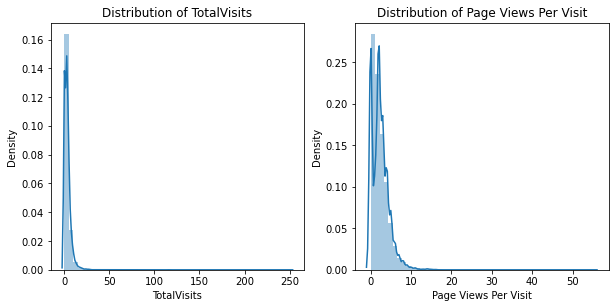

In [26]:
# Handling Null values that are present in numerical columns

var = ['TotalVisits', 'Page Views Per Visit']

plt.figure(figsize=(10,10))
for i,v in enumerate(var):
    plt.subplot(2,2,i+1)
    sns.distplot(leads[v])
    plt.title('Distribution of ' + v)
    plt.xlabel(v)
    plt.ylabel('Density')
plt.show()

In [27]:
# We can see the skewness in the data spread, hence imputing nulls with median values.

leads['TotalVisits']=leads['TotalVisits'].fillna(leads['TotalVisits'].median())
leads['Page Views Per Visit']=leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())

In [28]:
# rechecking if there are any missing value.
round((leads.isnull().mean()*100),2).sort_values(ascending = False)

Prospect ID                                      0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                       

No Null Values are remaining in the dataset

In [29]:
# Making lead number as index

leads=leads.set_index('Lead Number')
leads.drop(['Prospect ID'],1,inplace=True)

### Handling Outliers

In [30]:
# Storing column with dtype object and column with dtype number in two different list, so we can easily Perform analysis 

cat_vars=list(leads.loc[:, leads.dtypes == np.object].columns)
num_vars=list(leads.loc[:, leads.dtypes == np.int64].columns)
num_vars+=(list(leads.loc[:, leads.dtypes == np.number].columns))
print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(cat_vars,num_vars))

columns with object dtype 
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 
 columns with number dtype 
 ['Converted', 'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']


### Handling outliers in categorical columns

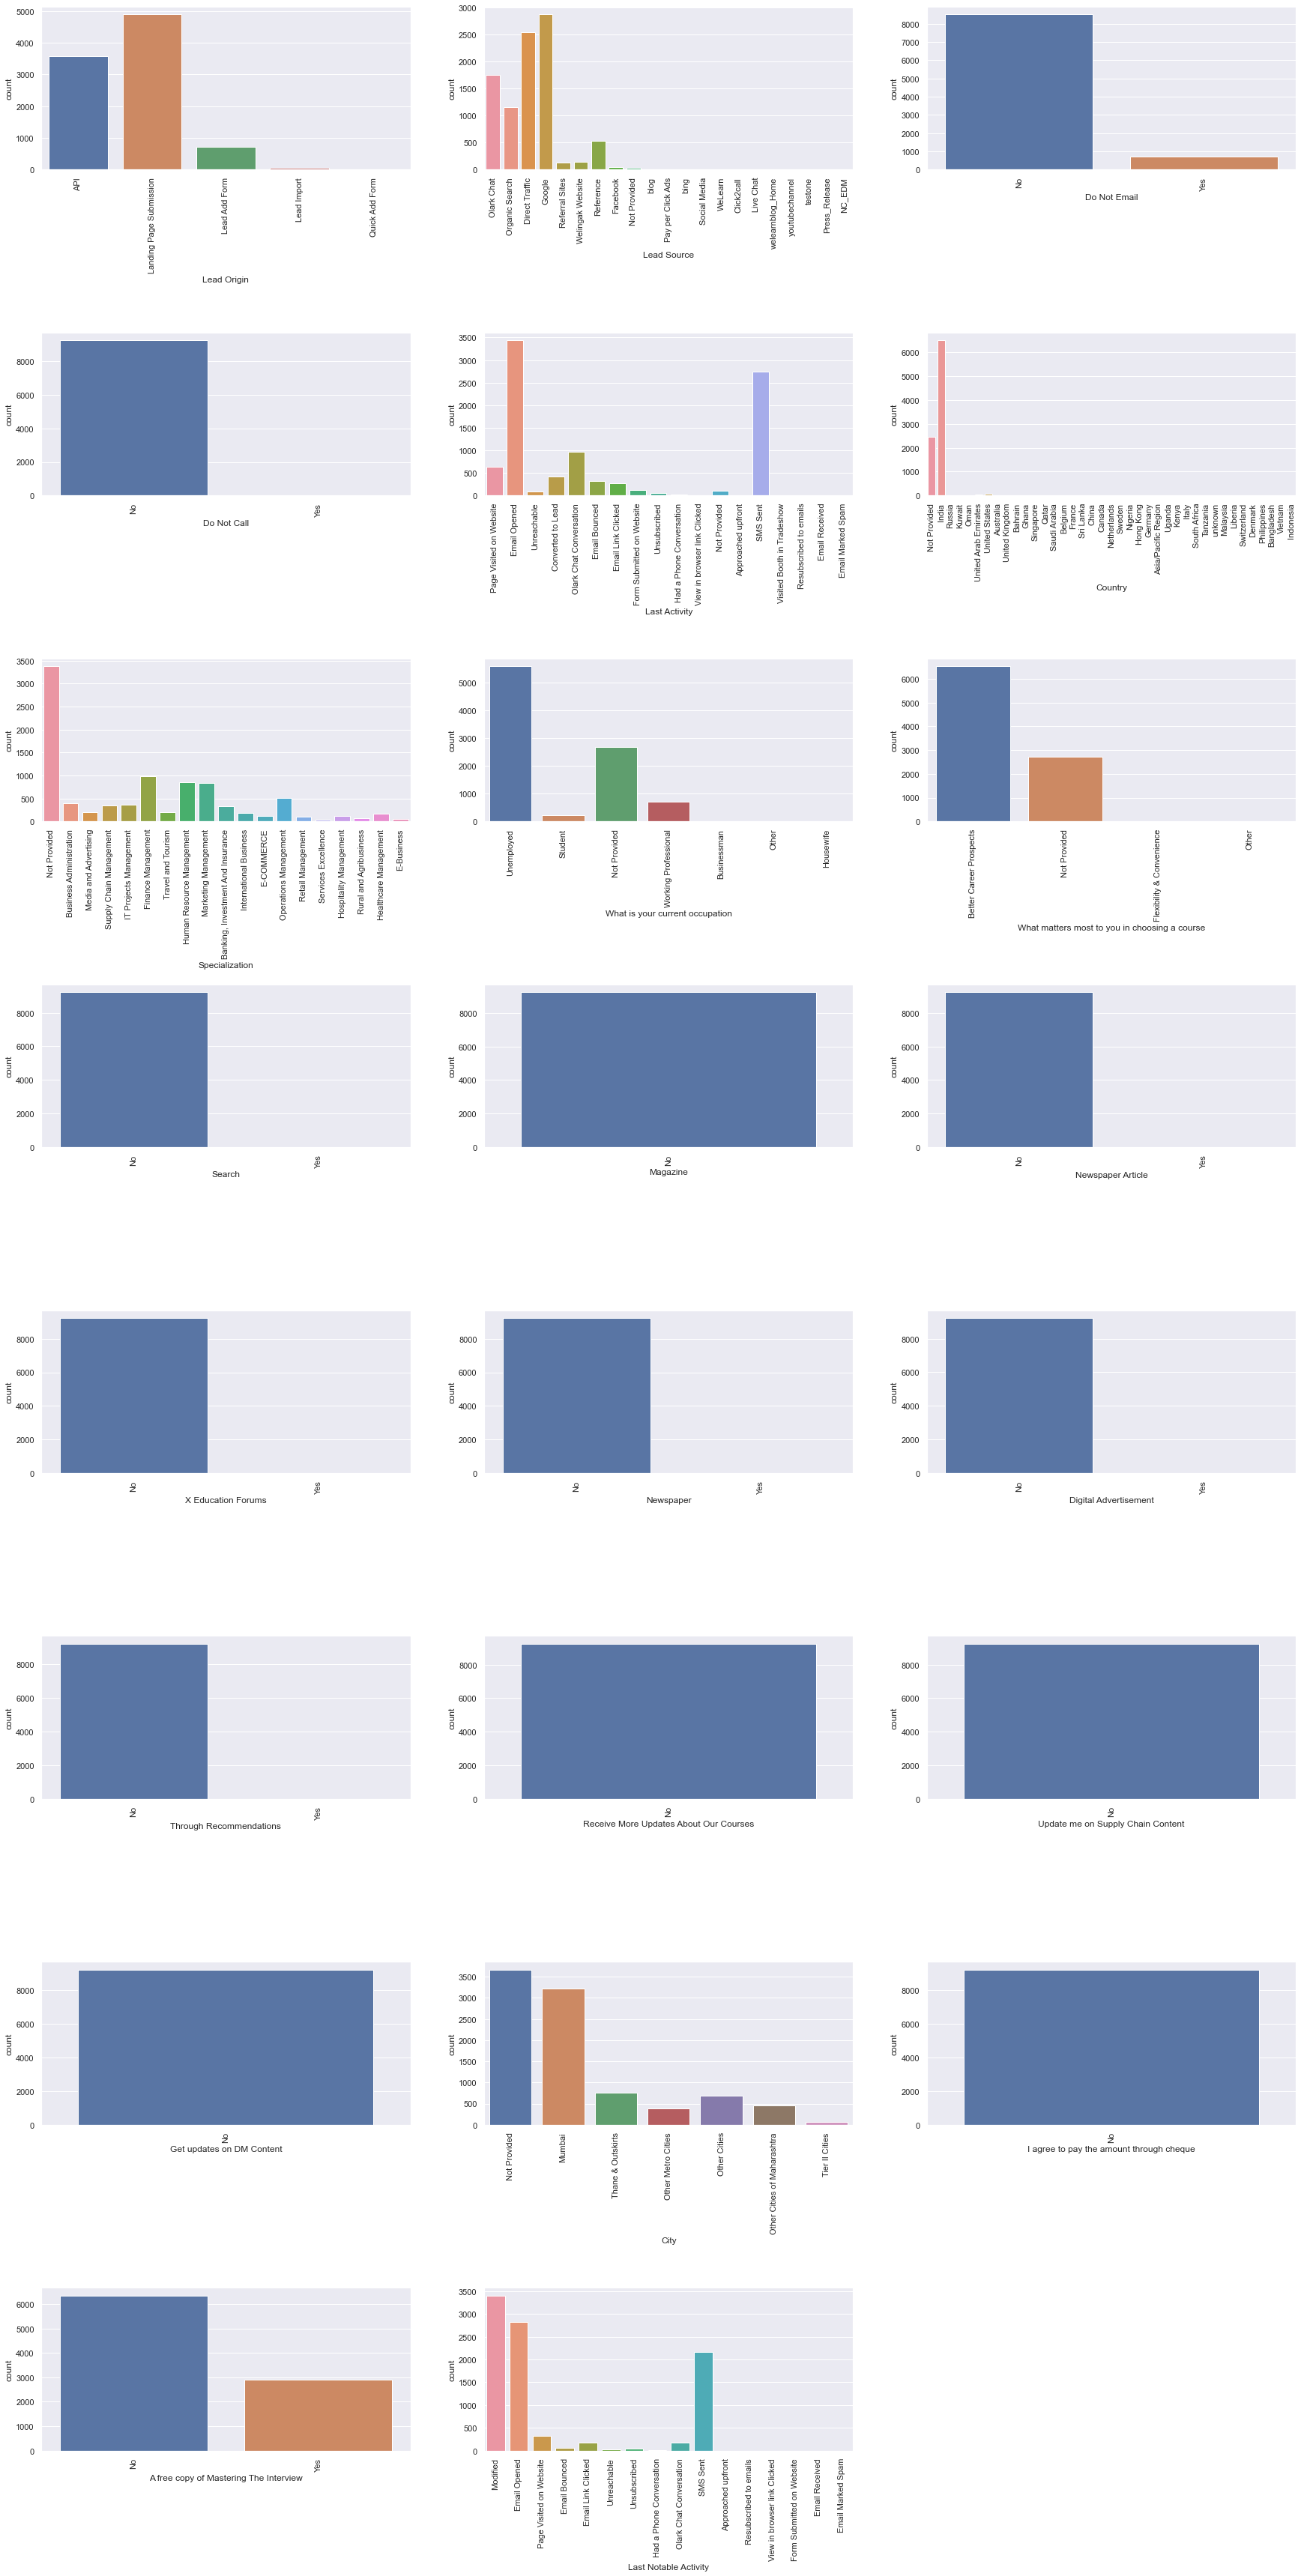

In [31]:
# plotting countplot for categorical variables to check the data spread.

plt.figure(figsize=(30, 60))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(cat_vars):
    plt.subplot(8,3, i[0]+1)
    sns.countplot(i[1],data=leads) 
    plt.xticks(rotation=90)
plt.show()

#### Insights 
- We can see that columns like 'Do not Email', 'Do not call' are highly skewed or have only one value as member. We can remove these columns to eliminate bias
- There are other columns with >5 members in them, we can group the least occuring members as 'Others'.
- For city column, we can see that 75% of the values are either Mumbai or undefined. so dropping it as it seems insignificant.

In [32]:
# Removing Highly Skewed variables

leads=leads.drop(['Do Not Call','Do Not Email','Country','Search', 'X Education Forums','Newspaper',
                      'Newspaper Article','Through Recommendations','Digital Advertisement', 'Magazine',
                      'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                      'Get updates on DM Content','I agree to pay the amount through cheque', 'City'],1)

In [33]:
# Handling columns having >5 members and grouping the least occuring members as 'Others'.
# Lead Source Column

col_ls=dict(leads['Lead Source'].value_counts()<1000)

# Considering 1000 as a threshold and grouping least occuring members or whose count <1000 as 'Others'
for i in col_ls.keys():
    if col_ls[i]==True:
        leads['Lead Source']=leads['Lead Source'].replace(i,'Other')

In [34]:
# Handling columns having >5 members and grouping the least occuring members as 'Others'.
# Last Activity Column

col_la=dict(leads['Last Activity'].value_counts()<300)

# Considering 300 as a threshold and grouping least occuring members or whose count <300 as 'Others'
for i in col_la.keys():
    if col_la[i]==True:
        leads['Last Activity']=leads['Last Activity'].replace(i,'Other')

In [35]:
# Handling columns having >5 members and grouping the least occuring members as 'Others'.
# Last Notable Activity

col_lna=dict(leads['Last Notable Activity'].value_counts()<500)

# Considering 500 as a threshold and grouping least occuring members or whose count <500 'Others'
for i in col_lna.keys():
    if col_lna[i]==True:
        leads['Last Notable Activity']=leads['Last Notable Activity'].replace(i,'Other')

In [36]:
# Handling columns having >5 members and grouping the least occuring members as 'Others'.
# Specialization Column

col_spec=dict(leads['Specialization'].value_counts()<350)

# Considering 350 as a threshold and grouping least occuring members or whose count <350 as 'Others'
for i in col_spec.keys():
    if col_spec[i]==True:
        leads['Specialization']=leads['Specialization'].replace(i,'Other')

### Handling Outliers on Numerical Columns

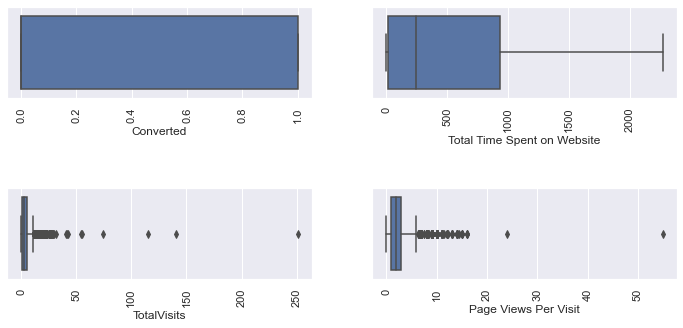

In [37]:
# plotting boxplot for Numerical variables to check the data spread.

plt.figure(figsize=(12, 5))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(num_vars):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(i[1],data=leads) 
    plt.xticks(rotation=90)
plt.show()

In [38]:
leads.TotalVisits.quantile([0.8, 0.9, 0.95,0.99, 0.995,0.999, 0.9992, 0.9995, 0.9999])

0.8000      5.0000
0.9000      7.0000
0.9500     10.0000
0.9900     17.0000
0.9950     20.8050
0.9990     31.5220
0.9992     41.6088
0.9995     54.3805
0.9999    149.3710
Name: TotalVisits, dtype: float64

In [39]:
# dropping rows in TotaVisits column which have outliers
leads = leads[leads['TotalVisits'] <= 35]

In [40]:
leads['Page Views Per Visit'].quantile([0.8, 0.9, 0.95,0.99, 0.995, 0.999, 0.9995, 0.9999, 0.99999])

0.80000     4.0000
0.90000     5.0000
0.95000     6.0000
0.99000     9.0000
0.99500    11.0000
0.99900    14.0000
0.99950    15.0000
0.99990    16.6160
0.99999    23.2616
Name: Page Views Per Visit, dtype: float64

In [41]:
leads = leads[leads['Page Views Per Visit'] <= 20]

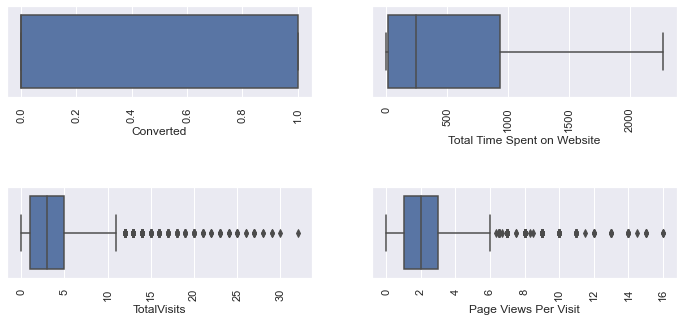

In [42]:
plt.figure(figsize=(12, 5))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(num_vars):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(i[1],data=leads) 
    plt.xticks(rotation=90)
plt.show()

we have deleted all the outliers from the data and now we can proceed with Exploratory data analysis. 

## Step 4: Exploratory Data Analysis

### Univariate Analysis - Categorical Variables

In [43]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9230 entries, 660737 to 579533
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9230 non-null   object 
 1   Lead Source                                    9230 non-null   object 
 2   Converted                                      9230 non-null   int64  
 3   TotalVisits                                    9230 non-null   float64
 4   Total Time Spent on Website                    9230 non-null   int64  
 5   Page Views Per Visit                           9230 non-null   float64
 6   Last Activity                                  9230 non-null   object 
 7   Specialization                                 9230 non-null   object 
 8   What is your current occupation                9230 non-null   object 
 9   What matters most to you in choosing a course

In [44]:
# creating cols which contains only Categorical variable
cat_vars2=leads.loc[:, leads.dtypes == np.object].columns
cat_vars2

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

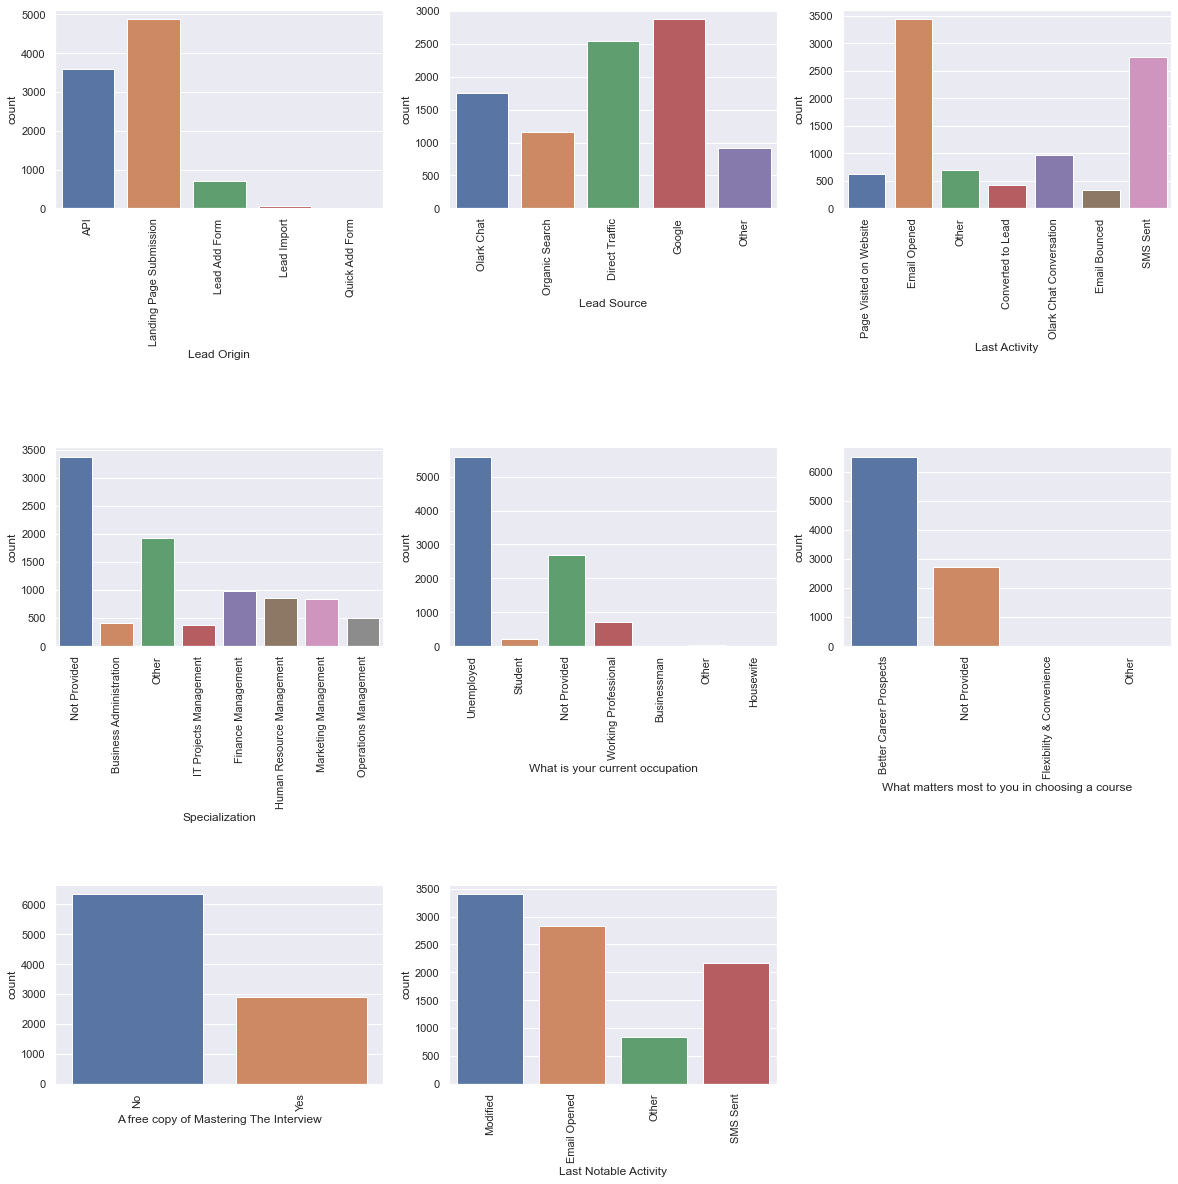

In [45]:
plt.figure(figsize=(20,60))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(cat_vars2):
    plt.subplot(8,3, i[0]+1)
    sns.countplot(i[1],data=leads)
    plt.xticks(rotation=90)
plt.show()

#### Insights :-
- In Lead Origin column, frequently occuring values are API and Landing page submission
- In Lead Source column, Direct Traffic and Google are the two main source for Leads
- In Last activity column, frequently occuring values are in High in Email Opened and SMS Sent in Last Activity

### Univariate Analysis - Numerical Variables

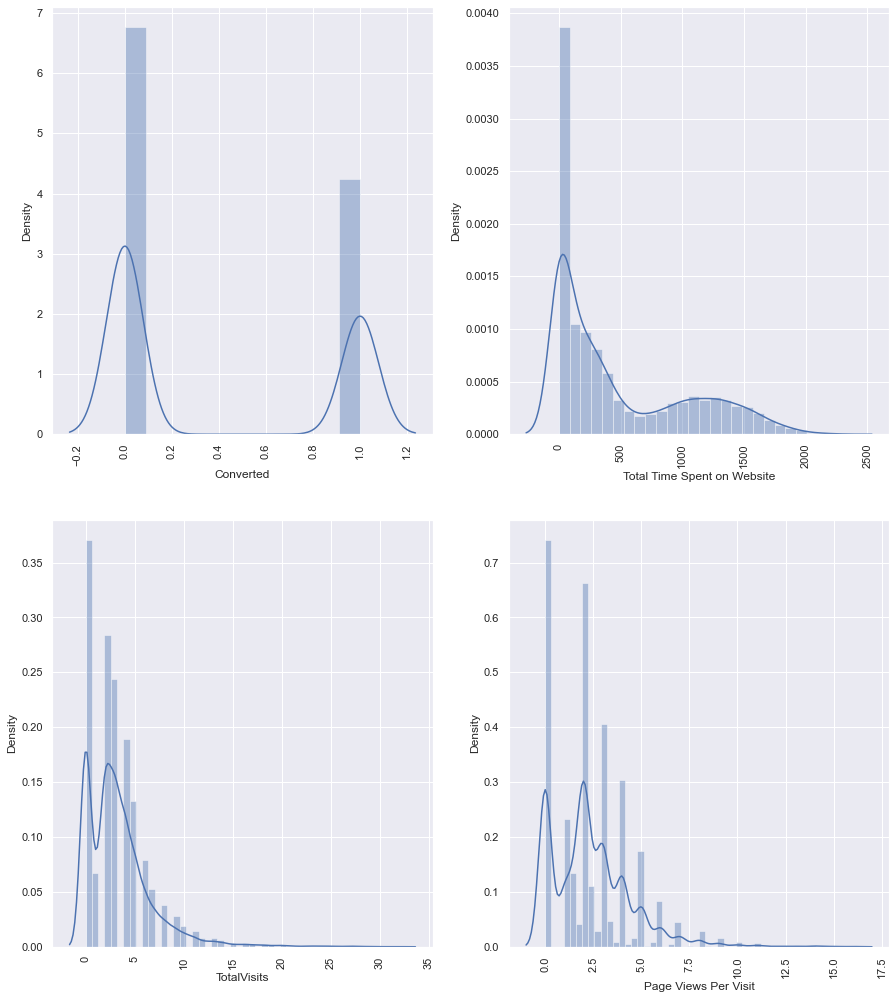

In [46]:
# Analysing data spread in Numerical columns

plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(num_vars):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(leads[i[1]])
    
    plt.xticks(rotation=90)
# plt.savefig('coniouus_univar.png',dpi=300,transparent=True)
plt.show()

#### Insights :-
- We can see that our response variable 'Converted' has no bias.
- 'Total Time spent on website', 'TotalVisits', 'Page Views Per Visit' have right skewed data spread and bimodal

### Bivariate Analysis

Bivariate Analysis With respect to Target Column ```Converted```

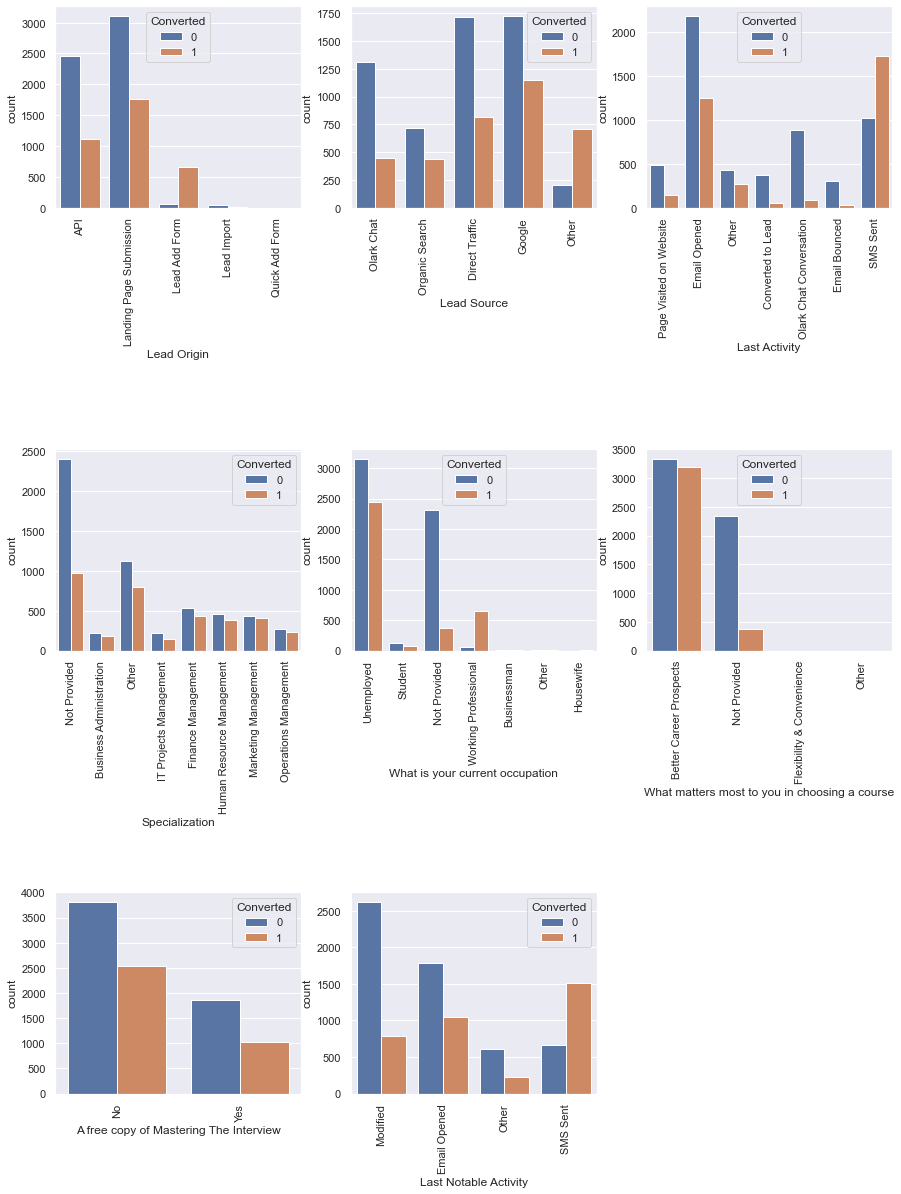

In [47]:
# Analysing Categorical variables vs response variable 'converted'

plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(cat_vars2):
    plt.subplot(3,3, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = leads)
    plt.xticks(rotation=90)
plt.show()

#### Insights :-
- Rate of Conversion is less in leads originated from Landing page submission and API and high through lead add form.
- Rate of Conversion is less in leads sourced from Direct Traffic and Olark chat and high in other.
- Rate of Conversion is less when last activity is Olark chat, converted to lead, email bounced or opened and high through sms sent.
- In Last Notable Activity it's mostly same as Last Activity.
- Rate of Conversion is very high with Working professionals.

### Multivariate Analysis

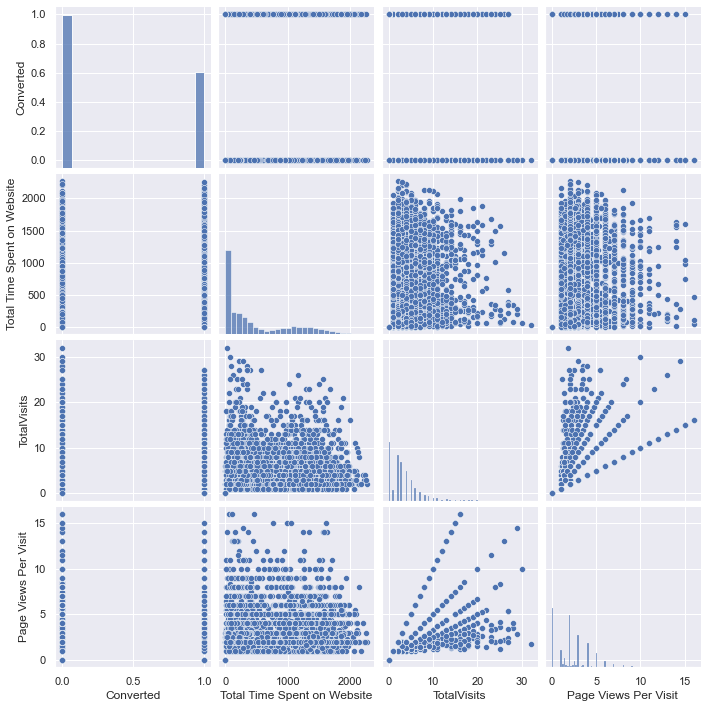

In [48]:
# Multivariate Analysis

sns.pairplot(data = leads, vars= num_vars)
plt.show()

#### Insights
- It seems there is some positive correlation between page views per visit vs totalvisits

## Step 5: Data Preparation and Feature Selection

In [49]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,Better Career Prospects,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,Better Career Prospects,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,Unemployed,Better Career Prospects,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,Better Career Prospects,No,Modified


In [50]:
# mapping of columns

leads['A free copy of Mastering The Interview']=leads['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [51]:
# Dropping the Last Notable Activity, Last Activity as these are just sales team generated variables.

leads.drop(['Last Notable Activity', 'Last Activity'] , 1, inplace=True)

In [52]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Not Provided,Unemployed,Better Career Prospects,0
660728,API,Organic Search,0,5.0,674,2.5,Not Provided,Unemployed,Better Career Prospects,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,1
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Unemployed,Better Career Prospects,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Not Provided,Unemployed,Better Career Prospects,0


### Creating dummies of Categorical Variables

In [53]:
# Creating dummies with n-1 variables and dropping first dummies to escape dummy variable trap.

dummies_df= pd.get_dummies(leads, drop_first=True)
dummies_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not Provided,Specialization_Operations Management,Specialization_Other,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Provided,What matters most to you in choosing a course_Other
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
660681,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


###  Splitting the Data into Training and Testing Sets

In [54]:
# Splitting dataset into X and y sets

X=dummies_df.iloc[:, 1:]
y=dummies_df[['Converted']]

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=1)

###  Feature Scaling

In [56]:
# Scaling the variables inorder to keep the magnitude in same level
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=\
scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

### Looking at the Correlation 

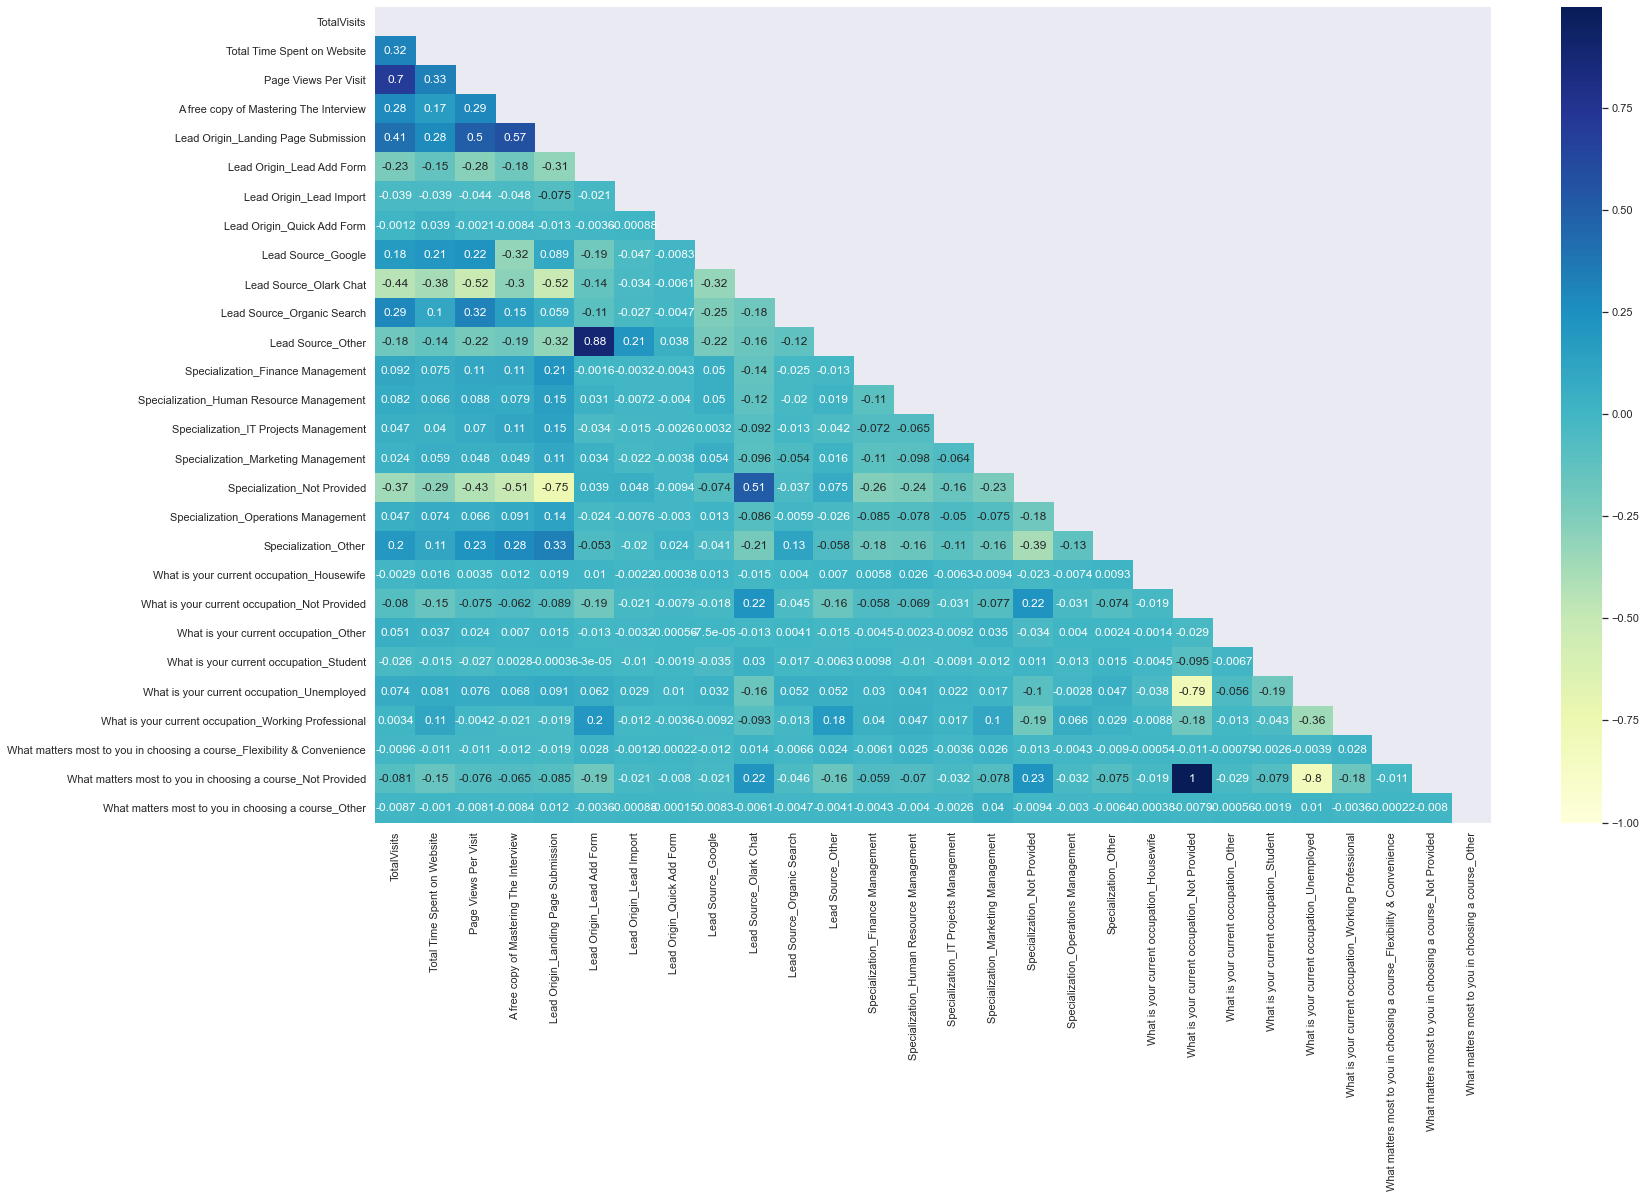

In [57]:
# Finding the Correlation using HeatMap

plt.figure(figsize = (25, 15))
mask = np.zeros(X_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(X_train.corr(), annot = True, vmin=-1, cmap="YlGnBu", mask=mask)
plt.show()

#### Insights
- We can see some columns are highly correlated
- Leads originated from lead add form is highly correlated with lead source other
- we will let RFE to decide to drop columns or not

In [58]:
# Using rfe for features selection
logreg=LogisticRegression()

In [59]:
# Running RFE with the output number of the variable equal to 20
rfe=RFE(logreg, 20)    # running RFE
rfe=rfe.fit(X_train,y_train)

In [60]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [61]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 9),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Other', False, 2),
 ('Specialization_Finance Management', False, 6),
 ('Specialization_Human Resource Management', False, 7),
 ('Specialization_IT Projects Management', False, 5),
 ('Specialization_Marketing Management', False, 8),
 ('Specialization_Not Provided', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Other', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Not Provided', True, 1),
 ('What is your current occupation_Other', True, 1),
 (

In [62]:
# After used RFE here RFE selected these variables should be used for modeling
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Specialization_Not Provided',
       'Specialization_Operations Management', 'Specialization_Other',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Not Provided',
       'What matters most to you in choosing a course_Other'],
      dtype='object')

In [63]:
# After used RFE here RFE selected these variables should not be used for modeling
X_train.columns[~ rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Quick Add Form',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management'],
      dtype='object')

## Step 6: Model Building Using Classification method

### Model 1

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2903.2
Date:                Tue, 10 May 2022   Deviance:                       5806.3
Time:                        00:01:06   Pearson chi2:                 7.69e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.0364      0.989      0.037      0.971      -1.902       1.975
TotalVisits                                                                 0.1623      0.038      4.234      0.000       0.087       0.237
Total Time Spent on Website                                                 1.0705      0.038     27.907      0.000       0.995       1.146
A free copy of Mastering The Interview                                     -0.1805      0.100     -1.811      0.070      -0.376       0.015
Lead Origin_Landing Page Submission                                        -0.5939      0.126     -4.696      0.000      -0.842      -0.346
Lead Origin_Lead Add Form                                                   3.8603      0.208     18.532      0.000       3.452       4.269
Lead Origin_Lead Import                                                     0.3089      0.458      0.674      0.500      -0.589       1.207
Lead Source_Google                                                          0.1724      0.092      1.877      0.061      -0.008       0.352
Lead Source_Olark Chat                                                      1.1454      0.135      8.491      0.000       0.881       1.410
Specialization_Not Provided                                                -0.6669      0.124     -5.359      0.000      -0.911      -0.423
Specialization_Operations Management                                        0.2541      0.145      1.748      0.081      -0.031       0.539
Specialization_Other                                                        0.1435      0.089      1.612      0.107      -0.031       0.318
What is your current occupation_Housewife                                  23.4758   2.64e+04      0.001      0.999   -5.18e+04    5.19e+04
What is your current occupation_Not Provided                               21.2527   2.08e+04      0.001      0.999   -4.07e+04    4.07e+04
What is your current occupation_Other                                       0.1362      1.188      0.115      0.909      -2.191       2.464
What is your current occupation_Student                                    -0.4919      1.011     -0.486      0.627      -2.474       1.490
What is your current occupation_Unemployed                                 -0.3627      0.990     -0.366      0.714      -2.304       1.579
What is your current occupation_Working Professional                        2.1208      1.007      2.106      0.035       0.147       4.095
What matters most to you in choosing a course_Flexibility & Convenience    -2.6560      3.249     -0.817      0.414      -9.024       3.712
Wha

In [65]:
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [66]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
12,What is your current occupation_Not Provided,182.34
18,What matters most to you in choosing a course_...,182.20
15,What is your current occupation_Unemployed,11.97
3,Lead Origin_Landing Page Submission,7.87
8,Specialization_Not Provided,5.13
7,Lead Source_Olark Chat,3.11
2,A free copy of Mastering The Interview,3.08
6,Lead Source_Google,2.59
16,What is your current occupation_Working Profes...,2.10
4,Lead Origin_Lead Add Form,2.04


`What is your current occupation_Not Provided` is insignificant because it has high vif value and p value

In [67]:
col=col.drop('What is your current occupation_Not Provided',1)

### Model 2

In [68]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2904.1
Date:                Tue, 10 May 2022   Deviance:                       5808.2
Time:                        00:01:07   Pearson chi2:                 7.68e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.6664      0.848      0.786      0.432      -0.995       2.328
TotalVisits                                                                 0.1618      0.038      4.219      0.000       0.087       0.237
Total Time Spent on Website                                                 1.0707      0.038     27.912      0.000       0.995       1.146
A free copy of Mastering The Interview                                     -0.1755      0.100     -1.762      0.078      -0.371       0.020
Lead Origin_Landing Page Submission                                        -0.5969      0.126     -4.721      0.000      -0.845      -0.349
Lead Origin_Lead Add Form                                                   3.8643      0.208     18.551      0.000       3.456       4.273
Lead Origin_Lead Import                                                     0.3130      0.458      0.683      0.495      -0.585       1.211
Lead Source_Google                                                          0.1768      0.092      1.926      0.054      -0.003       0.357
Lead Source_Olark Chat                                                      1.1500      0.135      8.525      0.000       0.886       1.414
Specialization_Not Provided                                                -0.6700      0.124     -5.384      0.000      -0.914      -0.426
Specialization_Operations Management                                        0.2557      0.145      1.759      0.079      -0.029       0.541
Specialization_Other                                                        0.1447      0.089      1.625      0.104      -0.030       0.319
What is your current occupation_Housewife                                  21.8430    1.6e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_Other                                      -0.4948      1.073     -0.461      0.645      -2.597       1.607
What is your current occupation_Student                                    -1.1333      0.866     -1.308      0.191      -2.831       0.564
What is your current occupation_Unemployed                                 -0.9944      0.849     -1.172      0.241      -2.658       0.669
What is your current occupation_Working Professional                        1.4751      0.858      1.719      0.086      -0.206       3.157
What matters most to you in choosing a course_Flexibility & Convenience    -2.6517      3.238     -0.819      0.413      -8.998       3.695
What matters most to you in choosing a course_Not Provided                 -2.2773      0.850     -2.680      0.007      -3.943      -0.612
Wha

In [69]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
14,What is your current occupation_Unemployed,11.87
3,Lead Origin_Landing Page Submission,7.87
17,What matters most to you in choosing a course_...,6.71
8,Specialization_Not Provided,5.13
7,Lead Source_Olark Chat,3.06
2,A free copy of Mastering The Interview,3.04
6,Lead Source_Google,2.54
15,What is your current occupation_Working Profes...,2.08
4,Lead Origin_Lead Add Form,2.02
10,Specialization_Other,1.59


`What is your current occupation_Unemployed` is insignificant because it has high p-value and vif value

In [70]:
col=col.drop('What is your current occupation_Unemployed',1)

### Model 3

In [71]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2904.9
Date:                Tue, 10 May 2022   Deviance:                       5809.8
Time:                        00:01:07   Pearson chi2:                 7.68e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.3104      0.143     -2.172      0.030      -0.591      -0.030
TotalVisits                                                                 0.1631      0.038      4.257      0.000       0.088       0.238
Total Time Spent on Website                                                 1.0706      0.038     27.927      0.000       0.995       1.146
A free copy of Mastering The Interview                                     -0.1749      0.100     -1.756      0.079      -0.370       0.020
Lead Origin_Landing Page Submission                                        -0.6143      0.126     -4.888      0.000      -0.861      -0.368
Lead Origin_Lead Add Form                                                   3.8607      0.208     18.536      0.000       3.453       4.269
Lead Origin_Lead Import                                                     0.3079      0.458      0.672      0.502      -0.590       1.206
Lead Source_Google                                                          0.1777      0.092      1.937      0.053      -0.002       0.358
Lead Source_Olark Chat                                                      1.1517      0.135      8.538      0.000       0.887       1.416
Specialization_Not Provided                                                -0.6871      0.124     -5.557      0.000      -0.929      -0.445
Specialization_Operations Management                                        0.2542      0.145      1.748      0.080      -0.031       0.539
Specialization_Other                                                        0.1438      0.089      1.616      0.106      -0.031       0.318
What is your current occupation_Housewife                                  22.8362    1.6e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_Other                                       0.4933      0.662      0.745      0.456      -0.804       1.791
What is your current occupation_Student                                    -0.1529      0.210     -0.728      0.467      -0.565       0.259
What is your current occupation_Working Professional                        2.4502      0.190     12.898      0.000       2.078       2.823
What matters most to you in choosing a course_Flexibility & Convenience    -2.6581      3.221     -0.825      0.409      -8.972       3.655
What matters most to you in choosing a course_Not Provided                 -1.2883      0.084    -15.322      0.000      -1.453      -1.123
What matters most to you in choosing a course_Other                       -21.4393   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
===

In [72]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Landing Page Submission,3.76
2,A free copy of Mastering The Interview,2.67
8,Specialization_Not Provided,2.47
7,Lead Source_Olark Chat,2.27
6,Lead Source_Google,1.89
16,What matters most to you in choosing a course_...,1.61
10,Specialization_Other,1.52
0,TotalVisits,1.44
4,Lead Origin_Lead Add Form,1.32
1,Total Time Spent on Website,1.28


```What matters most to you in choosing a course_Other``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [73]:
col=col.drop('What matters most to you in choosing a course_Other',1)

### Model 4

In [74]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2905.2
Date:                Tue, 10 May 2022   Deviance:                       5810.3
Time:                        00:01:07   Pearson chi2:                 7.68e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.3124      0.143     -2.186      0.029      -0.592      -0.032
TotalVisits                                                                 0.1635      0.038      4.267      0.000       0.088       0.239
Total Time Spent on Website                                                 1.0707      0.038     27.930      0.000       0.996       1.146
A free copy of Mastering The Interview                                     -0.1732      0.100     -1.740      0.082      -0.368       0.022
Lead Origin_Landing Page Submission                                        -0.6149      0.126     -4.893      0.000      -0.861      -0.369
Lead Origin_Lead Add Form                                                   3.8625      0.208     18.545      0.000       3.454       4.271
Lead Origin_Lead Import                                                     0.3094      0.458      0.675      0.500      -0.589       1.208
Lead Source_Google                                                          0.1792      0.092      1.953      0.051      -0.001       0.359
Lead Source_Olark Chat                                                      1.1532      0.135      8.549      0.000       0.889       1.418
Specialization_Not Provided                                                -0.6863      0.124     -5.550      0.000      -0.929      -0.444
Specialization_Operations Management                                        0.2550      0.145      1.754      0.079      -0.030       0.540
Specialization_Other                                                        0.1445      0.089      1.624      0.104      -0.030       0.319
What is your current occupation_Housewife                                  22.8369    1.6e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_Other                                       0.4937      0.662      0.746      0.456      -0.804       1.791
What is your current occupation_Student                                    -0.1526      0.210     -0.726      0.468      -0.564       0.259
What is your current occupation_Working Professional                        2.4509      0.190     12.901      0.000       2.079       2.823
What matters most to you in choosing a course_Flexibility & Convenience    -2.6578      3.222     -0.825      0.409      -8.973       3.658
What matters most to you in choosing a course_Not Provided                 -1.2880      0.084    -15.319      0.000      -1.453      -1.123
===========================================================================================================================================
"""

In [75]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Landing Page Submission,3.75
2,A free copy of Mastering The Interview,2.67
8,Specialization_Not Provided,2.47
7,Lead Source_Olark Chat,2.27
6,Lead Source_Google,1.89
16,What matters most to you in choosing a course_...,1.61
10,Specialization_Other,1.52
0,TotalVisits,1.44
4,Lead Origin_Lead Add Form,1.32
1,Total Time Spent on Website,1.28


```What is your current occupation_Housewife``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [76]:
col=col.drop('What is your current occupation_Housewife',1)

### Model 5

In [77]:
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6444
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.15045
Method:                          IRLS   Log-Likelihood:                -3040.3
Date:                Tue, 10 May 2022   Deviance:                       969.50
Time:                        00:01:07   Pearson chi2:                     970.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.4077      0.021     19.089      0.000       0.366       0.450
TotalVisits                                                                 0.0218      0.006      3.742      0.000       0.010       0.033
Total Time Spent on Website                                                 0.1914      0.005     34.892      0.000       0.181       0.202
A free copy of Mastering The Interview                                     -0.0271      0.015     -1.792      0.073      -0.057       0.003
Lead Origin_Landing Page Submission                                        -0.0786      0.018     -4.257      0.000      -0.115      -0.042
Lead Origin_Lead Add Form                                                   0.5874      0.025     23.875      0.000       0.539       0.636
Lead Origin_Lead Import                                                     0.0420      0.070      0.597      0.550      -0.096       0.180
Lead Source_Google                                                          0.0338      0.014      2.421      0.015       0.006       0.061
Lead Source_Olark Chat                                                      0.1752      0.019      9.001      0.000       0.137       0.213
Specialization_Not Provided                                                -0.0907      0.018     -5.031      0.000      -0.126      -0.055
Specialization_Operations Management                                        0.0359      0.022      1.642      0.101      -0.007       0.079
Specialization_Other                                                        0.0235      0.013      1.764      0.078      -0.003       0.050
What is your current occupation_Other                                       0.1340      0.108      1.241      0.215      -0.078       0.346
What is your current occupation_Student                                    -0.0243      0.033     -0.728      0.467      -0.090       0.041
What is your current occupation_Working Professional                        0.3070      0.019     15.761      0.000       0.269       0.345
What matters most to you in choosing a course_Flexibility & Convenience    -0.3101      0.275     -1.129      0.259      -0.849       0.228
What matters most to you in choosing a course_Not Provided                 -0.2035      0.011    -17.842      0.000      -0.226      -0.181
===========================================================================================================================================
"""

In [78]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Landing Page Submission,3.75
2,A free copy of Mastering The Interview,2.67
8,Specialization_Not Provided,2.46
7,Lead Source_Olark Chat,2.27
6,Lead Source_Google,1.89
15,What matters most to you in choosing a course_...,1.61
10,Specialization_Other,1.52
0,TotalVisits,1.44
4,Lead Origin_Lead Add Form,1.32
1,Total Time Spent on Website,1.28


```Lead Origin_Lead Import``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [79]:
col=col.drop('Lead Origin_Lead Import',1)

### Model 6

In [80]:
X_train_sm=sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6445
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.15044
Method:                          IRLS   Log-Likelihood:                -3040.5
Date:                Tue, 10 May 2022   Deviance:                       969.56
Time:                        00:01:08   Pearson chi2:                     970.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.4100      0.021     19.502      0.000       0.369       0.451
TotalVisits                                                                 0.0216      0.006      3.714      0.000       0.010       0.033
Total Time Spent on Website                                                 0.1912      0.005     34.914      0.000       0.181       0.202
A free copy of Mastering The Interview                                     -0.0278      0.015     -1.842      0.065      -0.057       0.002
Lead Origin_Landing Page Submission                                        -0.0799      0.018     -4.355      0.000      -0.116      -0.044
Lead Origin_Lead Add Form                                                   0.5852      0.024     24.061      0.000       0.538       0.633
Lead Source_Google                                                          0.0327      0.014      2.363      0.018       0.006       0.060
Lead Source_Olark Chat                                                      0.1732      0.019      9.035      0.000       0.136       0.211
Specialization_Not Provided                                                -0.0912      0.018     -5.062      0.000      -0.126      -0.056
Specialization_Operations Management                                        0.0359      0.022      1.641      0.101      -0.007       0.079
Specialization_Other                                                        0.0235      0.013      1.761      0.078      -0.003       0.050
What is your current occupation_Other                                       0.1338      0.108      1.239      0.215      -0.078       0.346
What is your current occupation_Student                                    -0.0245      0.033     -0.736      0.462      -0.090       0.041
What is your current occupation_Working Professional                        0.3068      0.019     15.754      0.000       0.269       0.345
What matters most to you in choosing a course_Flexibility & Convenience    -0.3104      0.275     -1.130      0.259      -0.849       0.228
What matters most to you in choosing a course_Not Provided                 -0.2037      0.011    -17.867      0.000      -0.226      -0.181
===========================================================================================================================================
"""

In [81]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Landing Page Submission,3.75
2,A free copy of Mastering The Interview,2.67
7,Specialization_Not Provided,2.43
6,Lead Source_Olark Chat,2.25
5,Lead Source_Google,1.89
14,What matters most to you in choosing a course_...,1.61
9,Specialization_Other,1.51
0,TotalVisits,1.44
4,Lead Origin_Lead Add Form,1.32
1,Total Time Spent on Website,1.28


```What is your current occupation_Student``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [82]:
col=col.drop('What is your current occupation_Student',1)

### Model 7

In [83]:
X_train_sm=sm.add_constant(X_train[col])
logm7=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6446
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.15042
Method:                          IRLS   Log-Likelihood:                -3040.7
Date:                Tue, 10 May 2022   Deviance:                       969.64
Time:                        00:01:08   Pearson chi2:                     970.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.4094      0.021     19.489      0.000       0.368       0.451
TotalVisits                                                                 0.0217      0.006      3.727      0.000       0.010       0.033
Total Time Spent on Website                                                 0.1912      0.005     34.917      0.000       0.181       0.202
A free copy of Mastering The Interview                                     -0.0277      0.015     -1.837      0.066      -0.057       0.002
Lead Origin_Landing Page Submission                                        -0.0802      0.018     -4.372      0.000      -0.116      -0.044
Lead Origin_Lead Add Form                                                   0.5852      0.024     24.064      0.000       0.538       0.633
Lead Source_Google                                                          0.0329      0.014      2.378      0.017       0.006       0.060
Lead Source_Olark Chat                                                      0.1728      0.019      9.021      0.000       0.135       0.210
Specialization_Not Provided                                                -0.0914      0.018     -5.074      0.000      -0.127      -0.056
Specialization_Operations Management                                        0.0360      0.022      1.646      0.100      -0.007       0.079
Specialization_Other                                                        0.0233      0.013      1.748      0.080      -0.003       0.049
What is your current occupation_Other                                       0.1345      0.108      1.245      0.213      -0.077       0.346
What is your current occupation_Working Professional                        0.3075      0.019     15.809      0.000       0.269       0.346
What matters most to you in choosing a course_Flexibility & Convenience    -0.3100      0.275     -1.128      0.259      -0.848       0.228
What matters most to you in choosing a course_Not Provided                 -0.2029      0.011    -17.879      0.000      -0.225      -0.181
===========================================================================================================================================
"""

In [84]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Landing Page Submission,3.73
2,A free copy of Mastering The Interview,2.67
7,Specialization_Not Provided,2.42
6,Lead Source_Olark Chat,2.24
5,Lead Source_Google,1.89
13,What matters most to you in choosing a course_...,1.60
9,Specialization_Other,1.51
0,TotalVisits,1.44
4,Lead Origin_Lead Add Form,1.32
1,Total Time Spent on Website,1.28


```What matters most to you in choosing a course_Flexibility & Convenience``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [85]:
col=col.drop('What matters most to you in choosing a course_Flexibility & Convenience',1)

### Model 8

In [86]:
X_train_sm=sm.add_constant(X_train[col])
logm8=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6447
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.15043
Method:                          IRLS   Log-Likelihood:                -3041.4
Date:                Tue, 10 May 2022   Deviance:                       969.83
Time:                        00:01:08   Pearson chi2:                     970.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.4088      0.021     19.466      0.000       0.368       0.450
TotalVisits                                                    0.0216      0.006      3.723      0.000       0.010       0.033
Total Time Spent on Website                                    0.1913      0.005     34.924      0.000       0.181       0.202
A free copy of Mastering The Interview                        -0.0276      0.015     -1.828      0.068      -0.057       0.002
Lead Origin_Landing Page Submission                           -0.0797      0.018     -4.349      0.000      -0.116      -0.044
Lead Origin_Lead Add Form                                      0.5850      0.024     24.054      0.000       0.537       0.633
Lead Source_Google                                             0.0330      0.014      2.385      0.017       0.006       0.060
Lead Source_Olark Chat                                         0.1726      0.019      9.008      0.000       0.135       0.210
Specialization_Not Provided                                   -0.0906      0.018     -5.036      0.000      -0.126      -0.055
Specialization_Operations Management                           0.0362      0.022      1.657      0.098      -0.007       0.079
Specialization_Other                                           0.0235      0.013      1.764      0.078      -0.003       0.050
What is your current occupation_Other                          0.1347      0.108      1.247      0.212      -0.077       0.346
What is your current occupation_Working Professional           0.3072      0.019     15.794      0.000       0.269       0.345
What matters most to you in choosing a course_Not Provided    -0.2029      0.011    -17.876      0.000      -0.225      -0.181
==============================================================================================================================
"""

In [87]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Landing Page Submission,3.73
2,A free copy of Mastering The Interview,2.67
7,Specialization_Not Provided,2.42
6,Lead Source_Olark Chat,2.24
5,Lead Source_Google,1.89
12,What matters most to you in choosing a course_...,1.60
9,Specialization_Other,1.51
0,TotalVisits,1.44
4,Lead Origin_Lead Add Form,1.31
1,Total Time Spent on Website,1.28


```What is your current occupation_Other``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [88]:
col=col.drop('What is your current occupation_Other',1)

### Model 9

In [89]:
X_train_sm=sm.add_constant(X_train[col])
logm9=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6448
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.15044
Method:                          IRLS   Log-Likelihood:                -3042.2
Date:                Tue, 10 May 2022   Deviance:                       970.06
Time:                        00:01:08   Pearson chi2:                     970.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.4100      0.021     19.544      0.000       0.369       0.451
TotalVisits                                                    0.0219      0.006      3.778      0.000       0.011       0.033
Total Time Spent on Website                                    0.1915      0.005     34.963      0.000       0.181       0.202
A free copy of Mastering The Interview                        -0.0279      0.015     -1.850      0.064      -0.057       0.002
Lead Origin_Landing Page Submission                           -0.0802      0.018     -4.377      0.000      -0.116      -0.044
Lead Origin_Lead Add Form                                      0.5847      0.024     24.042      0.000       0.537       0.632
Lead Source_Google                                             0.0327      0.014      2.363      0.018       0.006       0.060
Lead Source_Olark Chat                                         0.1728      0.019      9.018      0.000       0.135       0.210
Specialization_Not Provided                                   -0.0915      0.018     -5.086      0.000      -0.127      -0.056
Specialization_Operations Management                           0.0361      0.022      1.651      0.099      -0.007       0.079
Specialization_Other                                           0.0233      0.013      1.746      0.081      -0.003       0.049
What is your current occupation_Working Professional           0.3065      0.019     15.765      0.000       0.268       0.345
What matters most to you in choosing a course_Not Provided    -0.2032      0.011    -17.907      0.000      -0.225      -0.181
==============================================================================================================================
"""

In [90]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Landing Page Submission,3.73
2,A free copy of Mastering The Interview,2.67
7,Specialization_Not Provided,2.42
6,Lead Source_Olark Chat,2.24
5,Lead Source_Google,1.89
11,What matters most to you in choosing a course_...,1.60
9,Specialization_Other,1.51
0,TotalVisits,1.44
4,Lead Origin_Lead Add Form,1.31
1,Total Time Spent on Website,1.28


```Specialization_Operations Management	``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [91]:
col=col.drop('Specialization_Operations Management',1)

### Model 10

In [92]:
X_train_sm=sm.add_constant(X_train[col])
logm10=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6449
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.15048
Method:                          IRLS   Log-Likelihood:                -3043.5
Date:                Tue, 10 May 2022   Deviance:                       970.47
Time:                        00:01:08   Pearson chi2:                     970.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.4148      0.021     19.965      0.000       0.374       0.456
TotalVisits                                                    0.0218      0.006      3.749      0.000       0.010       0.033
Total Time Spent on Website                                    0.1916      0.005     34.996      0.000       0.181       0.202
A free copy of Mastering The Interview                        -0.0278      0.015     -1.842      0.066      -0.057       0.002
Lead Origin_Landing Page Submission                           -0.0803      0.018     -4.378      0.000      -0.116      -0.044
Lead Origin_Lead Add Form                                      0.5835      0.024     24.001      0.000       0.536       0.631
Lead Source_Google                                             0.0323      0.014      2.329      0.020       0.005       0.059
Lead Source_Olark Chat                                         0.1725      0.019      9.001      0.000       0.135       0.210
Specialization_Not Provided                                   -0.0961      0.018     -5.405      0.000      -0.131      -0.061
Specialization_Other                                           0.0185      0.013      1.421      0.155      -0.007       0.044
What is your current occupation_Working Professional           0.3074      0.019     15.814      0.000       0.269       0.345
What matters most to you in choosing a course_Not Provided    -0.2029      0.011    -17.883      0.000      -0.225      -0.181
==============================================================================================================================
"""

In [93]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Landing Page Submission,3.66
2,A free copy of Mastering The Interview,2.66
7,Specialization_Not Provided,2.40
6,Lead Source_Olark Chat,2.23
5,Lead Source_Google,1.88
10,What matters most to you in choosing a course_...,1.59
8,Specialization_Other,1.46
0,TotalVisits,1.44
4,Lead Origin_Lead Add Form,1.31
1,Total Time Spent on Website,1.27


```Specialization_Other``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [94]:
col=col.drop('Specialization_Other', 1)

### Model 11

In [95]:
X_train_sm=sm.add_constant(X_train[col])
logm11=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6450
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.15051
Method:                          IRLS   Log-Likelihood:                -3044.5
Date:                Tue, 10 May 2022   Deviance:                       970.78
Time:                        00:01:08   Pearson chi2:                     971.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.4207      0.020     20.664      0.000       0.381       0.461
TotalVisits                                                    0.0222      0.006      3.826      0.000       0.011       0.034
Total Time Spent on Website                                    0.1915      0.005     34.975      0.000       0.181       0.202
A free copy of Mastering The Interview                        -0.0269      0.015     -1.784      0.074      -0.056       0.003
Lead Origin_Landing Page Submission                           -0.0800      0.018     -4.365      0.000      -0.116      -0.044
Lead Origin_Lead Add Form                                      0.5828      0.024     23.974      0.000       0.535       0.630
Lead Source_Google                                             0.0311      0.014      2.249      0.025       0.004       0.058
Lead Source_Olark Chat                                         0.1718      0.019      8.968      0.000       0.134       0.209
Specialization_Not Provided                                   -0.1011      0.017     -5.809      0.000      -0.135      -0.067
What is your current occupation_Working Professional           0.3066      0.019     15.778      0.000       0.268       0.345
What matters most to you in choosing a course_Not Provided    -0.2029      0.011    -17.879      0.000      -0.225      -0.181
==============================================================================================================================
"""

In [96]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Landing Page Submission,3.47
2,A free copy of Mastering The Interview,2.62
7,Specialization_Not Provided,2.39
6,Lead Source_Olark Chat,2.21
5,Lead Source_Google,1.88
9,What matters most to you in choosing a course_...,1.59
0,TotalVisits,1.43
4,Lead Origin_Lead Add Form,1.29
1,Total Time Spent on Website,1.27
8,What is your current occupation_Working Profes...,1.17


```A free copy of Mastering The Interview``` is insignificant because it has high p-value in presence of other variables so it should be dropped

In [97]:
col=col.drop('A free copy of Mastering The Interview',1)

### Model 12

In [98]:
X_train_sm=sm.add_constant(X_train[col])
logm12=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.15056
Method:                          IRLS   Log-Likelihood:                -3046.1
Date:                Tue, 10 May 2022   Deviance:                       971.26
Time:                        00:01:08   Pearson chi2:                     971.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.4071      0.019     21.561      0.000       0.370       0.444
TotalVisits                                                    0.0217      0.006      3.754      0.000       0.010       0.033
Total Time Spent on Website                                    0.1914      0.005     34.947      0.000       0.181       0.202
Lead Origin_Landing Page Submission                           -0.0860      0.018     -4.770      0.000      -0.121      -0.051
Lead Origin_Lead Add Form                                      0.5922      0.024     24.955      0.000       0.546       0.639
Lead Source_Google                                             0.0439      0.012      3.716      0.000       0.021       0.067
Lead Source_Olark Chat                                         0.1788      0.019      9.536      0.000       0.142       0.216
Specialization_Not Provided                                   -0.0950      0.017     -5.566      0.000      -0.128      -0.062
What is your current occupation_Working Professional           0.3086      0.019     15.911      0.000       0.271       0.347
What matters most to you in choosing a course_Not Provided    -0.2031      0.011    -17.895      0.000      -0.225      -0.181
==============================================================================================================================
"""

In [99]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
6,Specialization_Not Provided,2.36
5,Lead Source_Olark Chat,2.21
2,Lead Origin_Landing Page Submission,1.59
8,What matters most to you in choosing a course_...,1.59
4,Lead Source_Google,1.56
0,TotalVisits,1.42
3,Lead Origin_Lead Add Form,1.29
1,Total Time Spent on Website,1.27
7,What is your current occupation_Working Profes...,1.17


- Here we got all the p-value are under 0.05 and VIF is also under 5
- we can consider this as our Final Model

## Step 7: Model Evaluation

In [100]:
# Predicting values on ytrain
y_train_pred = logm12.predict(X_train_sm).values.reshape(-1)

In [101]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.290725,621739
1,0,0.161372,604721
2,0,0.222124,596193
3,1,0.274051,646558
4,0,0.300065,643963


In [102]:
#  let's take 0.5 as Cutoff at random
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)

In [103]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.290725,621739,0
1,0,0.161372,604721,0
2,0,0.222124,596193,0
3,1,0.274051,646558,0
4,0,0.300065,643963,0


In [104]:
# Finding the metrics like accuracy, sensitivity and specificity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [105]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity {}, specificity {}'.format(acc,sensi,speci))

Accuracy: 0.7961615848939793, Sensitivity 0.6412825651302605, specificity 0.8935955622793746


Here we got low Sensitivity when we chose the Cutoff as 0.5.

In [106]:
# Finding the Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3544,  422],
       [ 895, 1600]], dtype=int64)

In [107]:
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [108]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.10640443772062531


In [109]:
# positive predictive value 
print (TP / float(TP+FP))

0.7912957467853611


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7983780130660059


In [111]:
# Defining the function to plot the ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

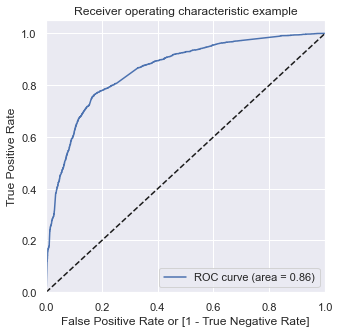

In [113]:
# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

ROC Curves shows us the tradeoff between the True Positive Rate (TPR) and the False Positive Rate (FPR)

### Finding the Optimal Threshold 

In [114]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.290725,621739,0,1,1,1,0,0,0,0,0,0,0
1,0,0.161372,604721,0,1,1,0,0,0,0,0,0,0,0
2,0,0.222124,596193,0,1,1,1,0,0,0,0,0,0,0
3,1,0.274051,646558,0,1,1,1,0,0,0,0,0,0,0
4,0,0.300065,643963,0,1,1,1,1,0,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.417428  0.997595  0.052446
0.1   0.1  0.560904  0.972345  0.302068
0.2   0.2  0.634886  0.941884  0.441755
0.3   0.3  0.746943  0.866132  0.671962
0.4   0.4  0.798638  0.721844  0.846949
0.5   0.5  0.796162  0.641283  0.893596
0.6   0.6  0.768921  0.513427  0.929652
0.7   0.7  0.744002  0.397595  0.961926
0.8   0.8  0.698653  0.241283  0.986384
0.9   0.9  0.665222  0.140681  0.995209


<Figure size 1440x1080 with 0 Axes>

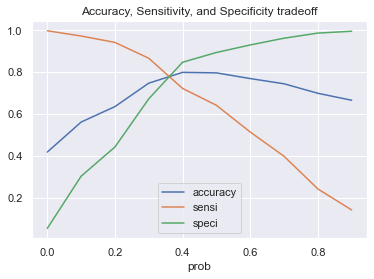

In [116]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Accuracy, Sensitivity, and Specificity tradeoff')
plt.show()

From the curve above, 0.33 is the optimum point to take it as a cutoff probability

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.290725,621739,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.161372,604721,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.222124,596193,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.274051,646558,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.300065,643963,0,1,1,1,1,0,0,0,0,0,0,0


In [118]:
# Printing the Metrics Accuracy, Sensitivity, Specicity
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specifitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.787184646339576, Sensitivity 0.7855711422845691, specifitiy 0.7881996974281392  


In [119]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3544,  422],
       [ 895, 1600]], dtype=int64)

In [120]:
# Finding the Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7

In [121]:
# Finding the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7855711422845691

In [122]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

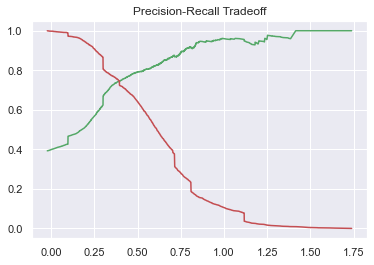

In [123]:
# Precision-Recall Curve
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
plt.title('Precision-Recall Tradeoff')
plt.show()

Here we got 0.33 as the Cut-off as Precesion-Recall Threshold

## Step 8: Making Prediction on test set

Scaling on Test Set

In [124]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [125]:
#Adding constant
X_test_sm = sm.add_constant(X_test[col])
#Making prediction
y_test_pred = logm12.predict(X_test_sm)
y_test_pred[:10]

Lead Number
633531    0.329849
587710    0.321875
627546    0.698153
622747    0.096977
637023    0.713462
625676    0.565330
596395    0.666110
597890    0.307801
652918    0.156856
581286    0.298924
dtype: float64

In [126]:
# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [129]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,633531,0.329849
1,0,587710,0.321875
2,0,627546,0.698153
3,0,622747,0.096977
4,0,637023,0.713462


In [130]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [131]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,633531,0.329849,0
1,0,587710,0.321875,0
2,0,627546,0.698153,1
3,0,622747,0.096977,0
4,0,637023,0.713462,1


In [132]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)

In [133]:
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7851209823040809, Sensitivity 0.7960526315789473, specitiy 0.7782991202346041  


- We can see that our model is doing well in test data set.
- Sensitivity (also called as true positive rate) measures the proportion of actual positives which are correctly identified as positives.
- We can see that our model is giving about 0.80 sensitivity. It means that 80 percent time our model is able to predict (actually)converted as (predicted)converted.

### Assigning Lead Score to each of the Leads

In [134]:
# making new df with lead score
lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['Lead Number','Converted_Prob']]
df2=y_pred_final[['Lead Number','Converted_Prob']]

In [135]:
lead_scorer_df=df1.append(df2,ignore_index=True)

In [136]:
# Assigning the value to the Lead Score by Multiplying 100
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_Prob'].apply(lambda x: round((x*100),2))

In [137]:
# dropping Converted_Prob
lead_scorer_df.drop('Converted_Prob',1,inplace=True)
lead_scorer_df.head()

,Lead Number,Lead Score
0,621739,29.07
1,604721,16.14
2,596193,22.21
3,646558,27.41
4,643963,30.01


## Conclusion / Final Inferences :-

- We have assigned a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
- Company can Target the customers with higher lead score as they have a higher conversion chance.

Below is the list of Features that are most significant in identifying Hot Leads:

Top 3 Features:
- When the lead origin is Lead add format.
- When the Occupation is Working Professional
- The total time spend on the Website.

Other Important Features:
- Total number of visits.
- When the lead source was:
    a. Google
    b. Olark Chat
- When Lead Origin is Landing Page Submission